<a href="https://colab.research.google.com/github/Tiffany0410/JSC270A3/blob/main/JSC270A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Assignment 3: Simulation

Shi Tang 1005930619

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

# 1. Bayesian Simulation

D) Using the values of a and b above, simulate 1000 draws each from the prior and posterior distributions you derived earlier. Assume a dataset of 20 individuals, 4 of whom have contracted the disease (i.e. n = 20, Σni=1xi = 4). Plot the prior and posterior distributions (histograms are fine). You may find the numpy function np.random.beta() useful here. How does the posterior mean compare to 1) the prior mean, and 2) the traditional likelihood estimate, n1 Σni=1xi? Why do you think this is?

In [ ]:
def beta_dis(a, b):
  return np.random.beta(a, b, 1000)

In [ ]:
np.random.seed(10)

prior_dis = beta_dis(1, 1)
poster_dis = beta_dis(5, 17)

mean_prior = np.mean(prior_dis)
mean_poster = np.mean(poster_dis)

print("Prior mean: " + str(mean_prior) + "\nPosterior mean: " + str(mean_poster) + "\nTraditional likelihood estimate: " + str(4/20))

Prior mean: 0.5168979778548164
Posterior mean: 0.22700055764425425
Traditional likelihood estimate: 0.2


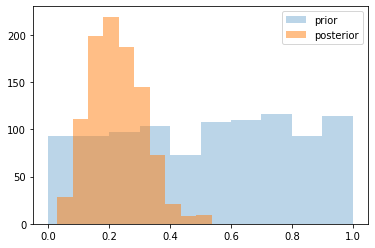

In [ ]:
plt.hist(prior_dis, alpha = 0.3, label="prior")
plt.hist(poster_dis, alpha = 0.5, label="posterior")
plt.legend()
plt.show()

E) Suppose scientists are fairly certain that the contraction rate of COVID is close to that of the flu, which is fairly low. To encode this belief, we change the hyperparameters of our prior to a = 1, b = 3. Simulate 1000 draws each from the prior and posterior distributions using the new hyperparameters. Assume a dataset identical to the one in part D (ie. n = 20, Σni=1xi = 4). Plot the new prior and posterior distributions. What are the new prior and posterior means, and how do they compare to those you found in part D? Explain the differences.

In [ ]:
np.random.seed(20)

e_prior_dis = beta_dis(1, 3)
e_poster_dis = beta_dis(5, 19)

e_mean_prior = np.mean(e_prior_dis)
e_mean_poster = np.mean(e_poster_dis)

print("New prior mean: " + str(e_mean_prior) + "\nNew posterior mean: " + str(e_mean_poster) + "\nTraditional likelihood estimate: " + str(4/20))

New prior mean: 0.241552917072909
New posterior mean: 0.21006952673609594
Traditional likelihood estimate: 0.2


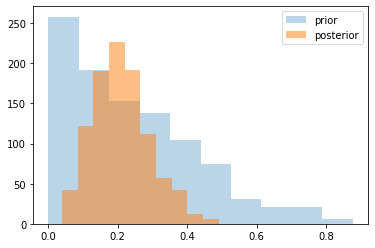

In [ ]:
plt.hist(e_prior_dis, alpha = 0.3, label="prior")
plt.hist(e_poster_dis, alpha = 0.5, label="posterior")
plt.legend()
plt.show()

F) Now suppose we have the same prior as in E (a = 1,b = 3), but we get a different dataset: n = 20, Σni=1xi = 12. Simulate 1000 draws each from the prior and posterior distributions using the new dataset. Plot the new prior and posterior distributions (again, histograms are fine). Compare the prior and posterior means to the likelihood estimate defined earlier. How do these results compare to those you obtained in parts D and E? Explain these differences.

In [ ]:
np.random.seed(30)

f_prior_dis = beta_dis(1, 3)
f_poster_dis = beta_dis(13, 11)

f_mean_prior = np.mean(f_prior_dis)
f_mean_poster = np.mean(f_poster_dis)

print("New prior mean: " + str(f_mean_prior) + "\nNew posterior mean: " + str(f_mean_poster) + "\nTraditional likelihood estimate: " + str(12/20))

New prior mean: 0.24617771775211092
New posterior mean: 0.5386528930945568
Traditional likelihood estimate: 0.6


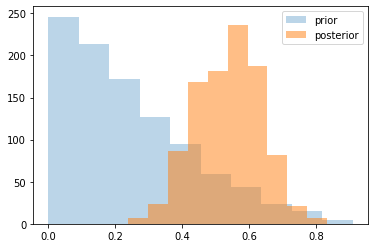

In [ ]:
plt.hist(f_prior_dis, alpha = 0.3, label="prior")
plt.hist(f_poster_dis, alpha = 0.5, label="posterior")
plt.legend()
plt.show()

# 2. Asymptotic Behavior


B) Suppose now that we know the exact distribution of X is given by λ = 2. In python, generate 6 different random samples from this distribution with sizes {10,20,50,100,500,2000}. You may find the function np.random.exponential() from the numpy package useful here (note that the parameter argument for this function is inverted, ie λ = β1 ). Plot the distribution of each sample (i.e. 6 plots total, or optionally 1 plot with 6 curves).

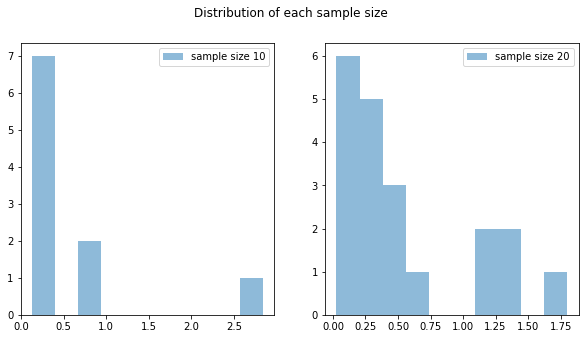

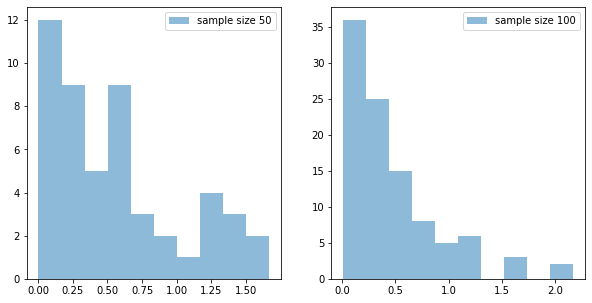

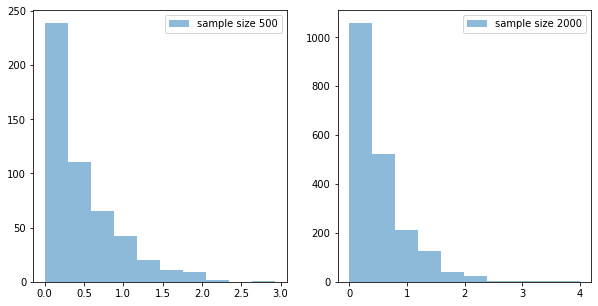

In [ ]:
sample_size = [10,20,50,100,500,2000]

np.random.seed(50)

sample_10 = np.random.exponential(1/2, sample_size[0])
sample_20 = np.random.exponential(1/2, sample_size[1])
sample_50 = np.random.exponential(1/2, sample_size[2])
sample_100 = np.random.exponential(1/2, sample_size[3])
sample_500 = np.random.exponential(1/2, sample_size[4])
sample_2000 = np.random.exponential(1/2, sample_size[5])


fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of each sample size')
plt1.hist(sample_10, alpha = 0.5, label="sample size 10")
plt1.legend()

plt2.hist(sample_20, alpha = 0.5, label="sample size 20")
plt2.legend()
fig.show()

fig2, (plt3, plt4) = plt.subplots(1, 2, figsize=(10,5))
plt3.hist(sample_50, alpha = 0.5, label="sample size 50")
plt3.legend()

plt4.hist(sample_100, alpha = 0.5, label="sample size 100")
plt4.legend()
fig2.show()

fig3, (plt5, plt6) = plt.subplots(1, 2, figsize=(10,5))
plt5.hist(sample_500, alpha = 0.5, label="sample size 500")
plt5.legend()

plt6.hist(sample_2000, alpha = 0.5, label="sample size 2000")
plt6.legend()
fig3.show()

C) Using your samples from part B, plot the mean of the sample as a function of sample size, with mean on the y-axis, and sample size on the x-axis(numpy has a handy np.mean() function for this). What is the theoretical mean when λ = 2? Include this as a horizontal line on your plot. What happens to the sample mean as sample size grows? What is the name of the statistical ’law’ that explains the sample average behavior you’ve just seen?

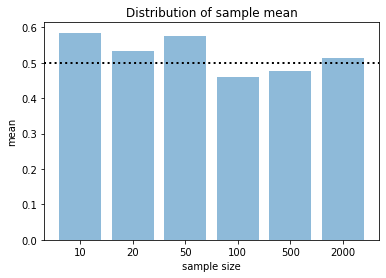

In [ ]:
mean_sample_10 = np.mean(sample_10)
mean_sample_20 = np.mean(sample_20)
mean_sample_50 = np.mean(sample_50)
mean_sample_100 = np.mean(sample_100)
mean_sample_500 = np.mean(sample_500)
mean_sample_2000 = np.mean(sample_2000)

sample_mean = [mean_sample_10, mean_sample_20, mean_sample_50, mean_sample_100, mean_sample_500, mean_sample_2000]
theo_mean = 1/2

sample_size = ['10','20','50','100','500','2000']
plt.bar(sample_size, sample_mean, alpha = 0.5)
plt.title('Distribution of sample mean')
plt.xlabel('sample size')
plt.ylabel('mean')
plt.axhline(theo_mean, color='k', linestyle='dotted', linewidth=2)
plt.show()


# 3. Bootstrapping and Classification

A) Usingvaluesτ=2,β0 =5,β1 =0.6,β2 =0.8,β3 =0.4,andc=0.5,simulateN=1000 observations of (Xi,yi), where Xi = (x1i,x2i,di). For simplicity, assume x1i ∼ Uniform(−100,100), and x2i ∼ Uniform(−150,150). 

In [ ]:
np.random.seed(300)

def generate_para():
  x1 = np.random.uniform(-100, 100)
  x2 = np.random.uniform(-150, 150)
  d = np.random.choice([0, 1, 2, 3, 4])
  return (x1, x2, d)

def generate_epilson():
  return np.random.normal(0, 2, 1000)

def linear_regression(x, e):
  return (5+0.6*(x[0])+0.8*(x[1])+0.4*(x[2])+e)

def logistic(x):
  return np.exp(x)/1+np.exp(x)

e = generate_epilson()
x = [generate_para() for i in range(1000)]
y = []
for i in range(1000):
  y.append((logistic(linear_regression(x[i], e[i]))>0.5).astype(float))

B) Split your simulated data into separate training and test sets. Use an 80/20 split. Fit a logistic regression model to the training data, and plot the ROC curve associated with prediction of the test set. Again, please be sure to set your seed, for reproducibility. Note: If you’re planning on using sklearn.linear_model.LogisticRegression(), make sure to set the ’penalty’ argument to ’None’, to avoid regularization.

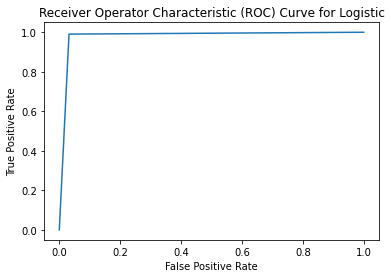

In [ ]:
np.random.seed(300)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 10)

logit = LogisticRegression(fit_intercept = True, penalty = 'none')

# Fit the model to the data
logit.fit(X_train, y_train)

# Get fitted values from training set
y_train_preds = logit.predict(X_train)

# Get fitted values from test set
y_test_preds = logit.predict(X_test)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve for Logistic')
plt.show()

C) Bootstrapping with Decision Tree Classification

In [ ]:
np.random.seed(400)

metrics = []

for i in range(5000):
  # get random indexes
  indexes = np.random.choice(1000, 1000, replace=True)
  array_x = np.array(x)
  array_y = np.array(y)

  new_x_train = array_x[indexes]
  new_y_train = array_y[indexes]

  all_index = [i for i in range(1000)]
  train_index = np.setdiff1d(all_index, indexes)
  new_x_test = array_x[train_index]
  new_y_test = array_y[train_index]

  dt = DecisionTreeClassifier()
  dt.fit(new_x_train, new_y_train)

  # Get fitted values from test set
  y_test_preds_tree = dt.predict(new_x_test)

  # Get F1 score
  test_acc = f1_score(new_y_test, y_test_preds_tree)

  metrics.append(test_acc)


D) Provide a plot showing the distribution of the bootstrapped out-of-sample performance metrics. In your bootstrap algorithm (and thus in your plot), you may choose whichever metric you wish (classification error, AUC, precison, recall, F1 score, etc.). Your plot should be a histogram (or kernel density) composed of B different bootstrapped measures of fit.

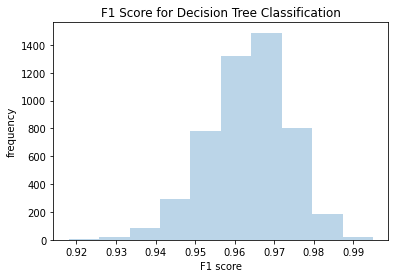

In [ ]:
plt.hist(metrics, alpha = 0.3)
plt.xlabel('F1 score')
plt.ylabel('frequency')
plt.title('F1 Score for Decision Tree Classification')
plt.show()

E) Compute the mean of the distribution you found in part D. Compare it to the performance of your logistic classifier in part A (you may need to find the matching metric from your logistic classifier to make a proper comparison). Which method performs better? Why do you think that is?

In [ ]:
np.random.seed(400)

metrics_log = []

for i in range(5000):
  # get random indexes
  indexes = np.random.choice(1000, 1000, replace=True)
  array_x = np.array(x)
  array_y = np.array(y)

  new_x_train = array_x[indexes]
  new_y_train = array_y[indexes]

  all_index = [i for i in range(1000)]
  train_index = np.setdiff1d(all_index, indexes)
  new_x_test = array_x[train_index]
  new_y_test = array_y[train_index]

  logit = LogisticRegression(fit_intercept = True, penalty = 'none')

  # Fit the model to the data
  logit.fit(new_x_train, new_y_train)

  # Get fitted values from test set
  y_test_preds_log = logit.predict(new_x_test)

  # Get F1 score
  test_acc = f1_score(new_y_test, y_test_preds_log)

  metrics_log.append(test_acc)

In [ ]:
mean_log = np.mean(metrics_log)
mean_tree = np.mean(metrics)
print("Mean of decision tree F1 score: " + str(mean_tree) + "\nMean of logisitc regression F1 score: " + str(mean_log))

Mean of decision tree F1 score: 0.9633636197561262
Mean of logisitc regression F1 score: 0.9870131940094923
